In [2]:
#source: https://www.youtube.com/watch?v=rTEtEy5o3X0
#source: https://www.youtube.com/watch?v=xtaom__-drE
#source: Examplecode from lecture
#source: ChatGPT

In [30]:
## Importing numpy for data handling
## Importing pands for printing confusion matrix table
## Importing matplotlib for plotting graphs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fixed seed for testing
np.random.seed(7)

## Loading dataset shuffle data
dataset = np.loadtxt("../../Datasets/pima-indians-diabetes.csv", delimiter=",")
#np.random.shuffle(dataset)
splitratio = 0.8

## Defining the first 8 columns as input and the last column as output
X_train = dataset[:int(len(dataset)*splitratio), 0:8]
X_val = dataset[int(len(dataset)*splitratio):, 0:8]
Y_train = dataset[:int(len(dataset)*splitratio), 8]
Y_val = dataset[int(len(dataset)*splitratio):, 8]

print(dataset)


[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [31]:
## Implementation of KNN
class MyKNeighborsClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

    def predict_proba(self, X_test):
        probabilities = [self._predict_proba(x) for x in X_test]
        return np.array(probabilities)

    def _predict_proba(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        k_nearest_labels = np.array(k_nearest_labels)
        label_counts = np.bincount(k_nearest_labels.astype(int))
        return label_counts / self.n_neighbors

In [32]:
## Storing data to print and plot
list_k_values = []
list_accuracy = []
list_precision = []
list_f1 = []
list_recall = []
list_mse = []
confusion_matrix_table = []

## Defining the range of the k-values that is testes for
k_values = range(1, 140)

## Using the KNN implementation for each value of K
for k in k_values:
    my_knn = MyKNeighborsClassifier(n_neighbors=k)
    my_knn.fit(X_train, Y_train)
    
    TP = TN = FP = FN = 0
    mse_values = 0
    pairs = []

    ## Within the K, keep track of performance
    for i in range(len(X_val)):
        x = X_val[i]
        y = Y_val[i]
        pred = my_knn.predict([x])[0]
        
        pairs.append((y, pred))

        if y == 1 and pred == 1:
            TP += 1
        elif y == 0 and pred == 0:
            TN += 1
        elif y == 1 and pred == 0:
            FN += 1
        elif y == 0 and pred == 1:
            FP += 1

        mse_values += ((pairs[i][0] - pairs[i][1]) ** 2)

    ## Defining performance stats
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    F1 = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    MSE = mse_values / len(X_val)

    ## Defining confusion matrix table. This is shown at the bottom of the page
    confusion_matrix_table.append([k, TP, FP, FN, TN, Accuracy])

    ## Storing data to be plotted
    list_k_values.append(k)
    list_accuracy.append(Accuracy)
    list_precision.append(Precision)
    list_f1.append(F1)
    list_recall.append(Recall)
    list_mse.append(MSE)


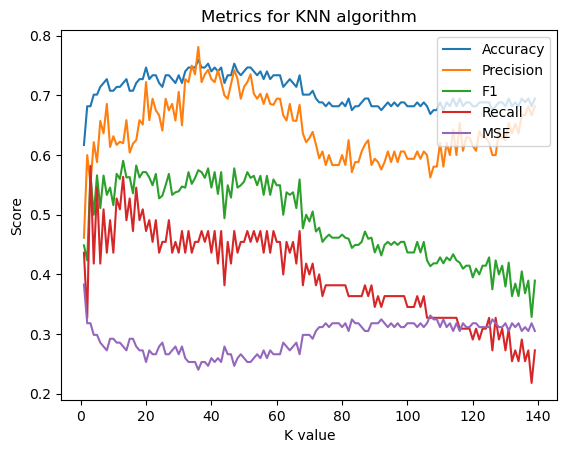

In [33]:
## Plotting all the statistical data in a plot
plt.plot(list_k_values, list_accuracy, label="Accuracy")
plt.plot(list_k_values, list_precision, label="Precision")
plt.plot(list_k_values, list_f1, label="F1")
plt.plot(list_k_values, list_recall, label="Recall")
plt.plot(list_k_values, list_mse, label="MSE")

plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Metrics for KNN algorithm')
plt.legend(loc='upper right')
plt.show()

In [34]:
## Printing highest values
print("Highest Accuracy:", max(list_accuracy), "at k =",list_accuracy.index(max(list_accuracy))+1)
print("Highest Precision:", max(list_precision), "at k =",list_precision.index(max(list_precision))+1)
print("Highest F1:", max(list_f1), "at k =",list_f1.index(max(list_f1))+1)
print("Highest Recall:", max(list_recall), "at k =",list_recall.index(max(list_recall))+1)
print("Highest MSE:", max(list_mse), "at k =",list_mse.index(max(list_mse))+1)

Highest Accuracy: 0.7597402597402597 at k = 36
Highest Precision: 0.78125 at k = 36
Highest F1: 0.5904761904761905 at k = 13
Highest Recall: 0.5818181818181818 at k = 3
Highest MSE: 0.38311688311688313 at k = 1


In [35]:
## Printing confusion matrix table
confusion_matrix = pd.DataFrame(confusion_matrix_table, columns=['K', 'TP', 'FP', 'FN', 'TN', '% TP and TN'])
pd.set_option('display.max_rows', None)
print(confusion_matrix)

       K  TP  FP  FN  TN  % TP and TN
0      1  24  28  31  71     0.616883
1      2  18  12  37  87     0.681818
2      3  32  26  23  73     0.681818
3      4  23  14  32  85     0.701299
4      5  30  21  25  78     0.701299
5      6  23  12  32  87     0.714286
6      7  28  16  27  83     0.720779
7      8  24  11  31  88     0.727273
8      9  27  17  28  82     0.707792
9     10  24  14  31  85     0.707792
10    11  29  18  26  81     0.714286
11    12  28  17  27  82     0.714286
12    13  31  19  24  80     0.720779
13    14  27  14  28  85     0.727273
14    15  29  19  26  80     0.707792
15    16  26  16  29  83     0.707792
16    17  30  18  25  81     0.720779
17    18  27  14  28  85     0.727273
18    19  28  15  27  84     0.727273
19    20  26  10  29  89     0.746753
20    21  27  14  28  85     0.727273
21    22  25  11  30  88     0.733766
22    23  27  13  28  86     0.733766
23    24  24  12  31  87     0.720779
24    25  25  14  30  85     0.714286
25    26  25